In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from utils import predictor
Pred = predictor.predictor(device_name = "cuda:2", model_name = "deit_base_distilled_patch16_224")

Model loaded on cuda:2


In [8]:
attn_dir = "./attns/ViT-b/"
pred_dir = "./preds/ViT-b/"
attns = []
for i in range(1000):
    attn = np.load(attn_dir + Pred.cat_labels[i] + ".npy")
    attns.append(attn)
attns = np.array(attns)
print(attns.shape)
attns = attns[:, :, :, 1:]
print(attns.shape)

(1000, 12, 50, 197)
(1000, 12, 50, 196)


In [9]:
attn_heads_dir = "./attns/ViT-b-heads/"
pred_heads_dir = "./preds/ViT-b-heads/"
attns_heads = []
for i in range(1000):
    attn = np.load(attn_heads_dir + Pred.cat_labels[i] + ".npy")
    attns_heads.append(attn)
attns_heads = np.array(attns_heads)
print(attns_heads.shape)
attns_heads = attns_heads[:, :, :, 1:]
print(attns_heads.shape)

(1000, 50, 12, 197)
(1000, 50, 12, 196)


# Among Heads / Layers

In [4]:
from tqdm import tqdm

layers_corr = np.zeros((12, 12))
for i in tqdm(range(12)):
    for j in range(12):
        layers_corr[i, j] = np.corrcoef(attns[:, i].reshape((1, 1000 * 50 * 196)), attns[:, j].reshape((1, 1000 * 50 * 196)))[0, 1]

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:26<00:00,  2.18s/it]


<AxesSubplot:>

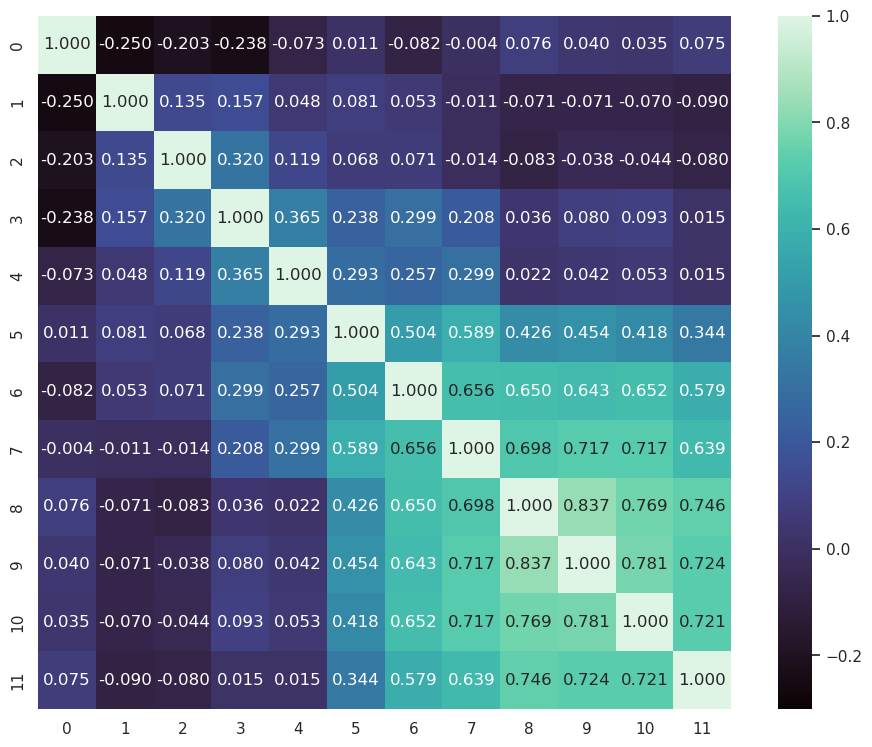

In [5]:
fig = plt.figure(figsize = (12, 9))
sns.set()
sns.heatmap(layers_corr, cmap = "mako", square = True, annot = True, fmt='.3f', vmin = -0.3, vmax = 1)

In [6]:
layers_corr_heads = np.zeros((12, 12))
for i in tqdm(range(12)):
    for j in range(12):
        layers_corr_heads[i, j] = np.corrcoef(attns_heads[:, :, i].reshape((1, 1000 * 50 * 196)), 
                                              attns_heads[:, :, j].reshape((1, 1000 * 50 * 196)))[0, 1]

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:25<00:00,  2.14s/it]


<AxesSubplot:>

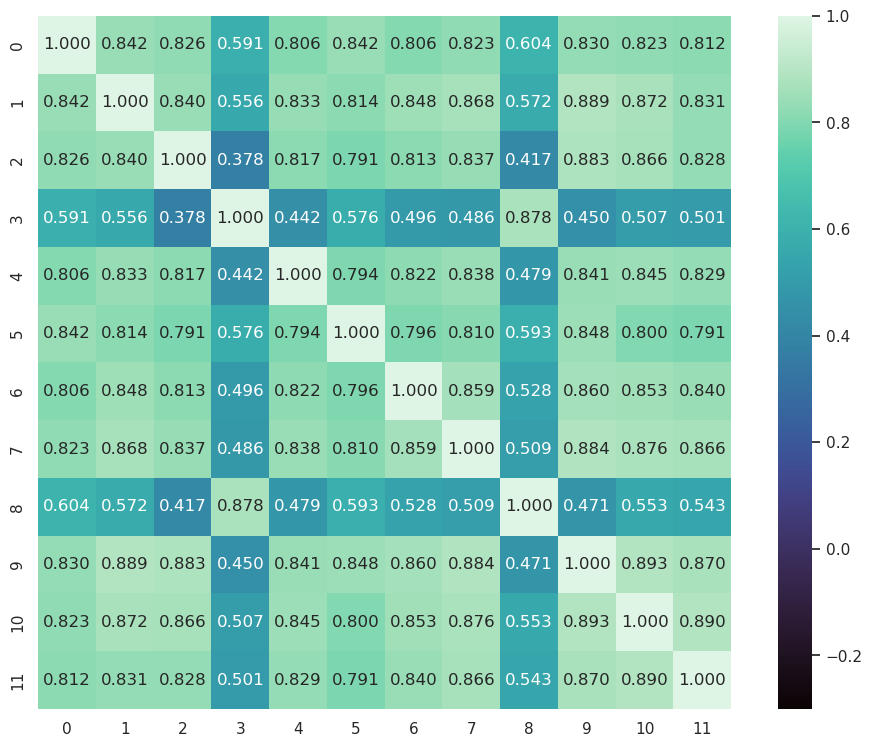

In [7]:
fig = plt.figure(figsize = (12, 9))
sns.set()
sns.heatmap(layers_corr_heads, cmap = "mako", square = True, annot = True, fmt='.3f', vmin = -0.3, vmax = 1)

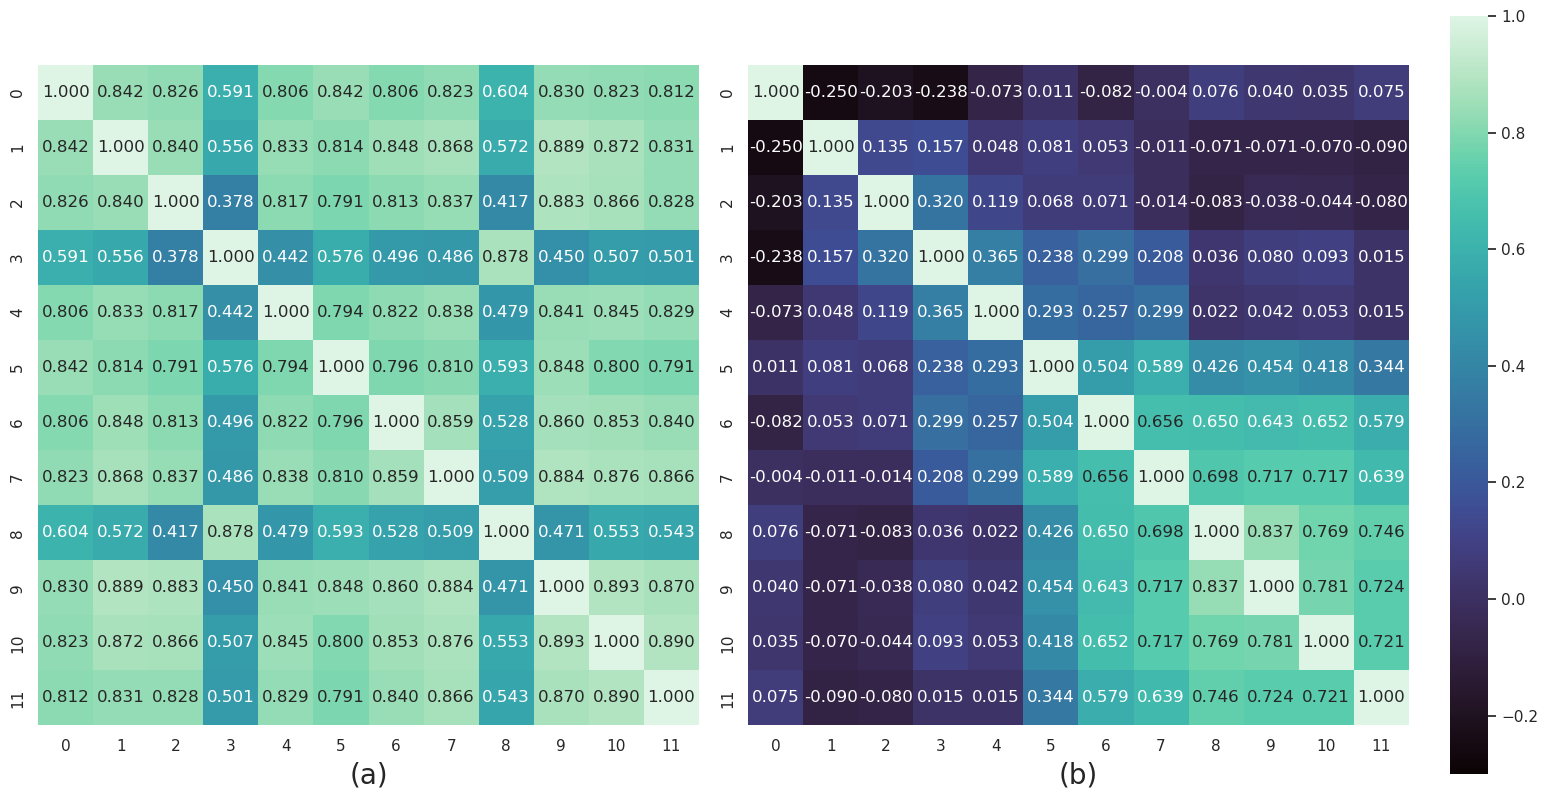

In [17]:
from matplotlib import gridspec

fig = plt.figure(figsize = (16, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 5]) 
# plot 1
ax0 = plt.subplot(gs[0])
sns.heatmap(layers_corr_heads, cmap = "mako", square = True, annot = True, fmt='.3f', vmin = -0.3, vmax = 1, cbar = False)
ax0.set_title("(a)", y = -0.1, fontsize = 20)
# plot 2
ax1 = plt.subplot(gs[1])
sns.heatmap(layers_corr, cmap = "mako", square = True, annot = True, fmt='.3f', vmin = -0.3, vmax = 1, cbar = True)
ax1.set_title("(b)", y = -0.1, fontsize = 20)

# img_col = plt.imshow(-np.log(attn[i]), cmap = "mako", vmin = -0.3, vmax = 1)
# cb_ax = fig.add_axes([1.0, 0.1, 0.02, 0.87]) #设置colarbar位置
# cbar = fig.colorbar(img_col, cax = cb_ax)
# cbar.ax.tick_params(labelsize = 16)

fig.tight_layout()
plt.savefig("./dist-headsandlayers.pdf")

# Numerical Distribution

/home/hxy/anaconda3/envs/timm/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


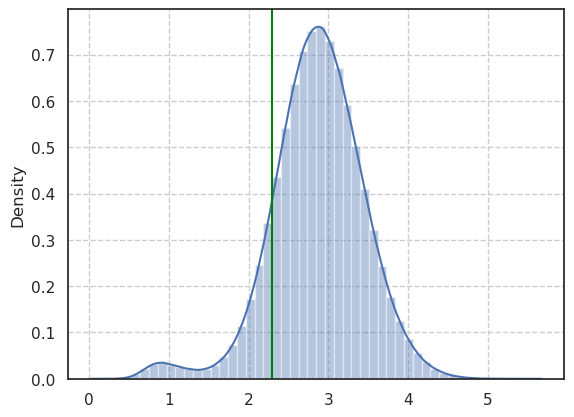

In [9]:
fig = plt.figure()
sns.set()
sns.set_style("white")
sns.distplot(-np.log10(attns[:, 11]))
plt.axvline(-np.log10(1 / 196), color = "green")
plt.grid(linestyle = '--') 

# Spatial Distribution

In [10]:
spa_dist = np.zeros((196))
for i in tqdm(range(1000)):
    for j in range(50):
        top_10 = np.argsort(-attns_heads[i, j, 1])[:10]
        for k in top_10:
            spa_dist[k] += 1
spa_dist = spa_dist.reshape((14, 14))
spa_dist /= np.sum(spa_dist)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 775.32it/s]


<AxesSubplot:>

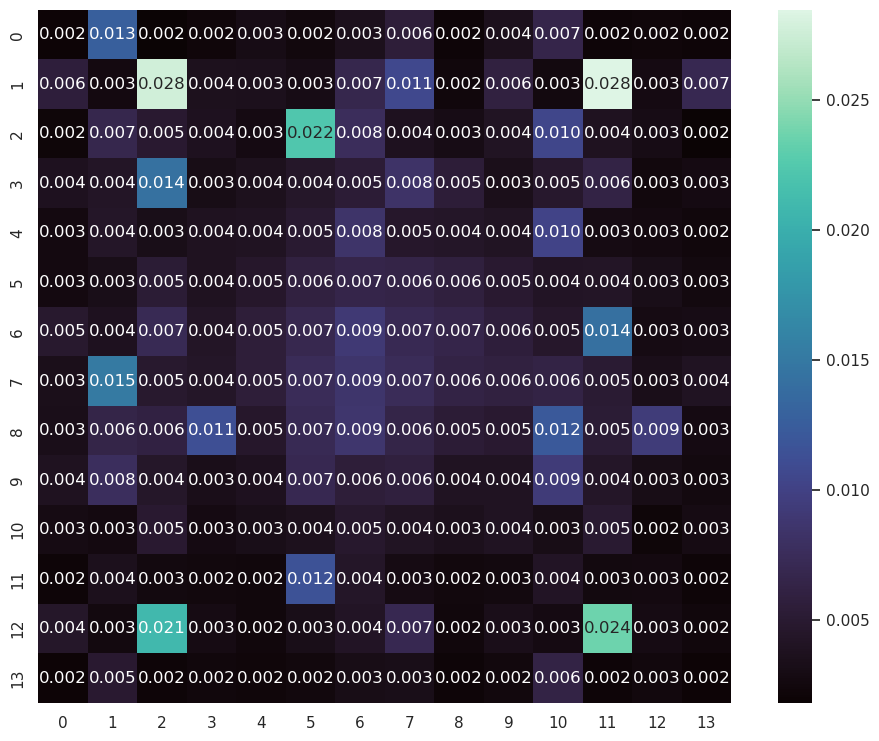

In [11]:
fig = plt.figure(figsize = (12, 9))
sns.set()
sns.heatmap(spa_dist, cmap = "mako", square = True, annot = True, fmt='.3f')

/home/hxy/anaconda3/envs/timm/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


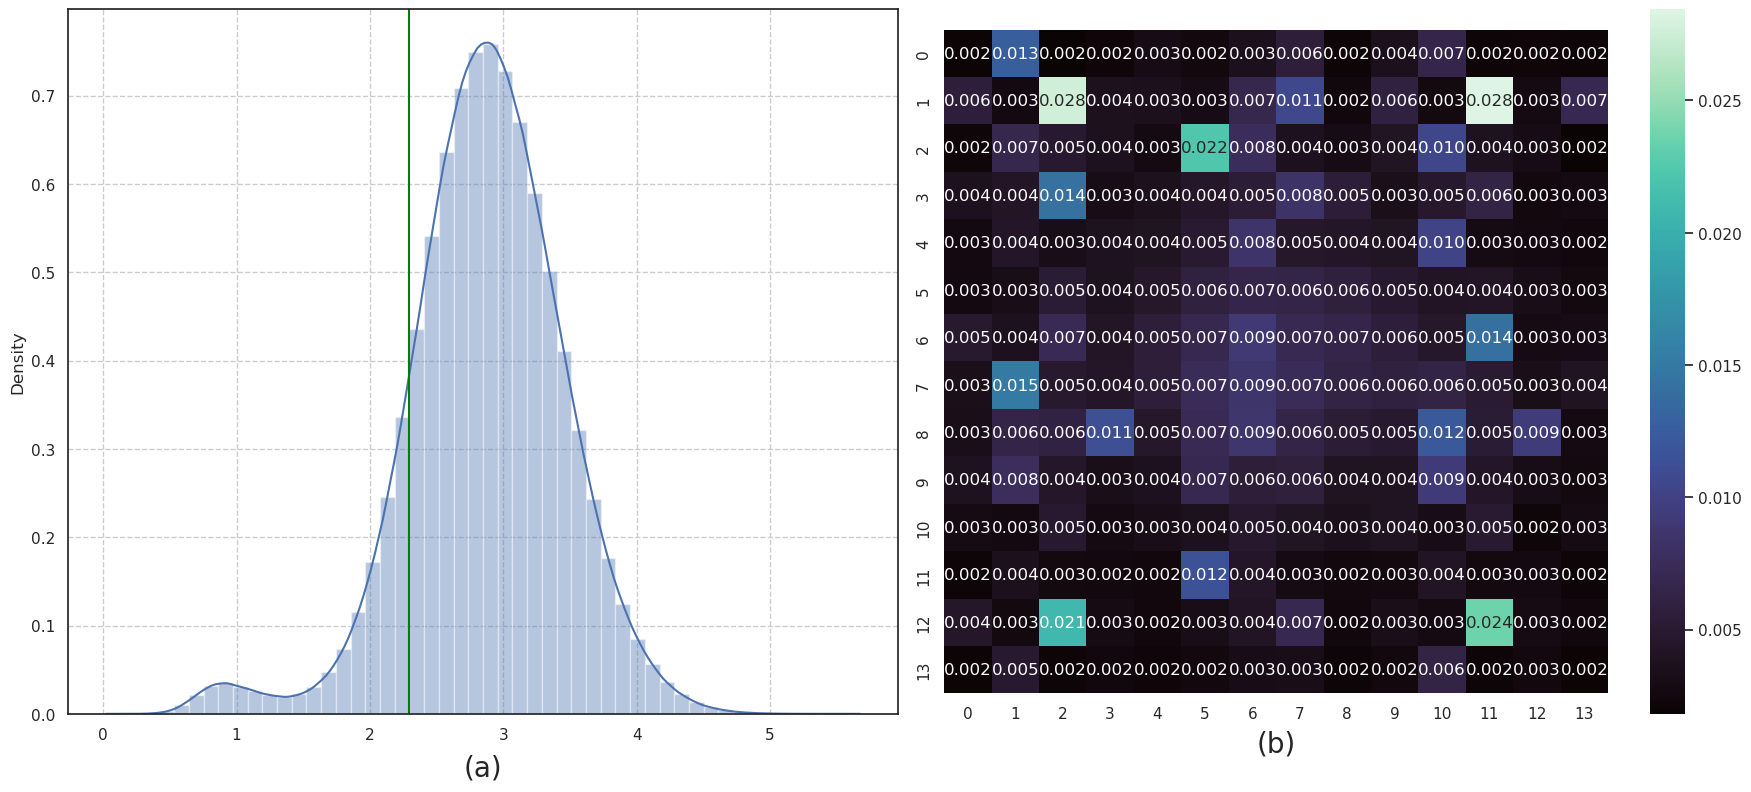

In [16]:
from matplotlib import gridspec

fig = plt.figure(figsize = (18, 8))
gs = gridspec.GridSpec(1, 2)#, width_ratios=[4, 5]) 
# plot 1
ax0 = plt.subplot(gs[0])
sns.set_style("white")
sns.distplot(-np.log10(attns[:, 11]))
plt.axvline(-np.log10(1 / 196), color = "green")
plt.grid(linestyle = '--') 
ax0.set_title("(a)", y = -0.1, fontsize = 20)
# plot 2
ax1 = plt.subplot(gs[1])
sns.heatmap(spa_dist, cmap = "mako", square = True, annot = True, fmt='.3f')
ax1.set_title("(b)", y = -0.1, fontsize = 20)

fig.tight_layout()
plt.savefig("./dist-numandspac.pdf")

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]/home/hxy/anaconda3/envs/timm/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
  8%|██████▉                                                                            | 1/12 [00:43<07:58, 43.54s/it]/home/hxy/anaconda3/envs/timm/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
 17%|█████████████▊   

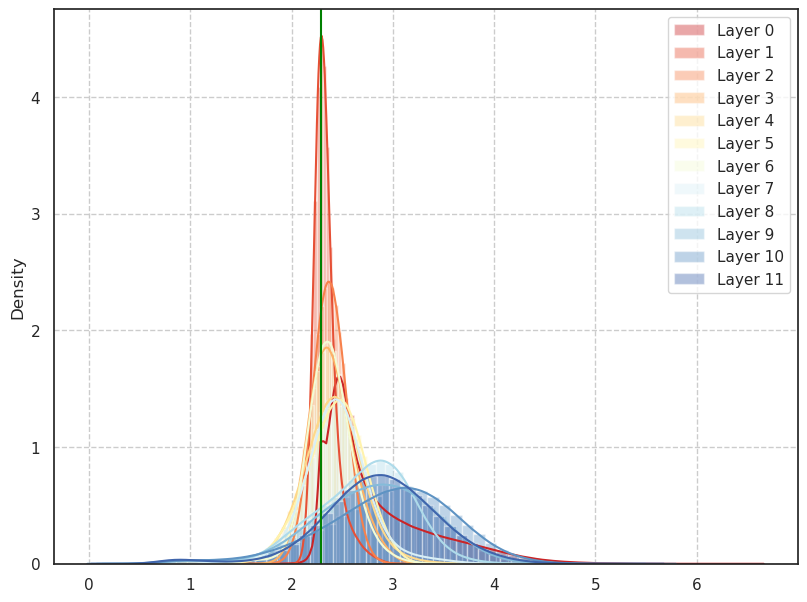

In [16]:
from tqdm import tqdm

fig = plt.figure(figsize = (9.6, 7.2))
sns.set()
sns.set_style("white")
for i in tqdm(range(12)):
    sns.distplot(-np.log10(attns[:, i]), label = "Layer " + str(i),
        color = sns.color_palette("RdYlBu", 12)[i])
plt.axvline(-np.log10(1 / 196), color = "green")
plt.grid(linestyle = '--')
plt.legend()
plt.savefig("dist_numlayers.pdf")

In [10]:
print(attns.shape)

(1000, 12, 50, 196)
